### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
# converting color mode to RGB and displaying the image as matplotlib figure
def matplotlib_imshow(
    img_title="", img=None, fig_h=7, cv_colorspace_conversion_flag=cv.COLOR_BGR2RGB
):
    # tinkering with size
    try:
        img_width, img_height = img.shape[0], img.shape[1]
        aspect_ratio = img_width / img_height
        plt.figure(figsize=(fig_h * aspect_ratio, fig_h))
    except AttributeError:
        print(
            "None Type image. Correct_syntax is, matplotlib_imshow(img_title, img, fig_h, cv_colorspace_conversion_flag)."
        )

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(img, cv_colorspace_conversion_flag))
    plt.title(img_title)
    plt.show()

## Contours ([Docs]())

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

In OpenCV, finding contours is like finding white object from black background. So remember, `object to be found should be white and background should be black.`

> The `cv.findContours(image, mode, method)` function

<u>Function Parameters</u>
- image: source image (an 8-bit single-channel image). Non-zero pixels are treated as 1's. Zero pixels remain 0's i.e, the image is treated as binary. **So, before finding contours, apply threshold or canny edge detection.**
- mode: contour retrieval mode. The available [retrieval modes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71) are,
    - cv.RETR_EXTERNAL: retrieves only the extreme outer contours.
    - cv.RETR_LIST: retrieves all of the contours without establishing any hierarchical relationships.
    - cv.RETR_CCOMP: retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes.
    - cv.RETR_TREE: retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- method: contour approximation method. The available [contour approximation modes]() are,
    - cv.CHAIN_APPROX_NONE: all the boundary points are stored. 
    - cv.CHAIN_APPROX_SIMPLE: compresses horizontal, vertical, and diagonal segments and leaves only their end points.

**Returns:** (modified image, contours, hierarchy)

`Note:`  findContours() no longer modifies the source image but returns a modified image as the first of three return parameters.

In [4]:
# Example: Detecting Contours in a license plate

In [5]:
license_plate_img = cv.imread("./imgs/license_plate.jpeg", 0)
license_plate_img_copy = copy.deepcopy(license_plate_img)

In [6]:
license_plate_blurred = cv.GaussianBlur(license_plate_img_copy, (5, 5), sigmaX=0.2)
license_plate_blurred_copy = copy.deepcopy(license_plate_blurred)

In [7]:
license_plate_denoised = cv.fastNlMeansDenoising(license_plate_blurred_copy)
license_plate_denoised_copy = copy.deepcopy(license_plate_denoised)

In [8]:
license_plate_thresholded = cv.adaptiveThreshold(
    license_plate_denoised_copy,
    255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY,
    9,
    2,
)
license_plate_thresholded_copy = copy.deepcopy(license_plate_thresholded)

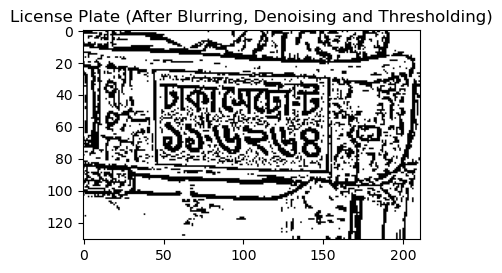

In [9]:
matplotlib_imshow(
    "License Plate (After Blurring, Denoising and Thresholding)",
    license_plate_thresholded,
)

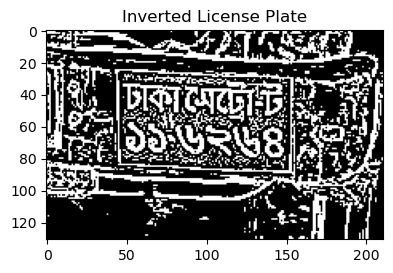

In [10]:
# As, the contours we want to detect should be white and not black like we have right now, we will invert the image
license_plate_inverted = cv.bitwise_not(license_plate_thresholded)
license_plate_inverted_copy = copy.deepcopy(license_plate_inverted)
matplotlib_imshow("Inverted License Plate", license_plate_inverted)

In [11]:
# now detecting contours
contours, hierarchy = cv.findContours(
    license_plate_inverted, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE
)

> The `cv.drawContours(image, contours, contourIdx, color, thickness)` function

<u>Function Parameters</u>
- image: image to draw contours on.
- contours: all the input contours.
- contourIdx: index of the contour to be drawn. If it is negative, all the contours are drawn.
- color: color of the drawn contours.
- thickness: thickness of the lines contours are drawn with.

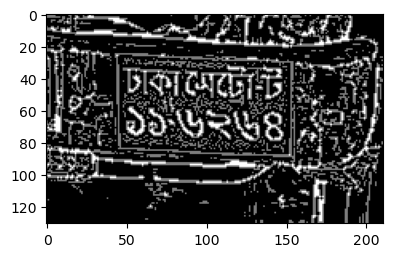

In [12]:
matplotlib_imshow(
    "", cv.drawContours(license_plate_inverted_copy, contours, -1, color=(125))
)